# HW3: Exploratory Analysis
For this homework, we will be applying the concepts from today's class to the [Credit Application Dataset](http://archive.ics.uci.edu/ml/datasets/Credit+Approval) from the UCI machine learning repository. 

This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. 

This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

I've created a list of arbitrary column names below, with the assumption that A16 represents whether or not the credit application was approved. 

## 1. Load the dataset
Download the [dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data) to your computer and update the file location in the pd.read_csv() function below: 

In [1]:
import pandas as pd
import numpy as np

# read in the data
names = [("A" + str(x+1)) for x in range(0,16)] # generate list of column names
df = (pd.read_csv('/Users/eunn/Downloads/crx.data', 
                 header=None,
                 names=names)
        .replace({'?': np.nan}))  # here we are automatically replace question marks with np.nan

In [2]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## 2. Find and repleace null values
The easiest way to check each column for null values is to use the following statement: 

In [3]:
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

We can use the following syntax to pull out rows that contain any null values: 

In [4]:
df[df.isnull().any(axis=1)]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,-
83,a,NaN,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,NaN,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,NaN,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,NaN,600,+
206,a,71.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,NaN,26726,+
248,NaN,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,+
254,b,NaN,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-


Examine the rows and remove the null values from each column in an appropriate way. 

For example, let's look at the unique vaues in A4. There appears to be two categorical values and the number 1.

In [5]:
df.A4.unique()

array(['u', 'y', nan, 'l'], dtype=object)

The simplest way to replace null values in categorical data is to fillna() with the most frequent column value, so that you are not changing the columns frequency distribution: 

In [6]:
df.A4.value_counts()

u    519
y    163
l      2
Name: A4, dtype: int64

In [7]:
df["A4"] = df.A4.fillna("u")

In [8]:
# replace nulls from each column
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [9]:
df.A1.value_counts() #object, b
df["A1"] = df.A1.fillna("b")

In [10]:
df.A2.value_counts() #object, 22.67
df["A2"] = df.A2.fillna("22.67")

In [11]:
#float, fill with mean
df["A3"].fillna(df["A3"].mean()).head()

0    0.000
1    4.460
2    0.500
3    1.540
4    5.625
Name: A3, dtype: float64

In [12]:
df.A5.value_counts() #object, g
df["A5"] = df.A5.fillna("g")

In [13]:
df.A6.value_counts() #object, c
df["A6"] = df.A6.fillna("c")

In [14]:
df.A7.value_counts() #object, v
df["A7"] = df.A7.fillna("v")

In [15]:
#float, fill with mean
df["A8"].fillna(df["A8"].mean()).head()

0    1.25
1    3.04
2    1.50
3    3.75
4    1.71
Name: A8, dtype: float64

In [16]:
df.A9.value_counts() #object, t
df["A9"] = df.A9.fillna("t")

In [17]:
df.A10.value_counts() #object, f
df["A10"] = df.A10.fillna("f")

In [18]:
#integer, fill with mean
df["A11"].fillna(df["A11"].mean()).head()

0    1
1    6
2    0
3    5
4    0
Name: A11, dtype: int64

In [19]:
df.A12.value_counts() #object, f
df["A12"] = df.A12.fillna("f")

In [20]:
df.A13.value_counts() #object, g
df["A13"] = df.A13.fillna("g")

In [21]:
df.A14.value_counts() #object, 0
df["A14"] = df.A14.fillna("0")

In [22]:
#integer, fill with mean
df["A15"].fillna(df["A15"].mean()).head()

0      0
1    560
2    824
3      3
4      0
Name: A15, dtype: int64

In [23]:
df.A16.value_counts() #object, -
df["A16"] = df.A16.fillna("-")

In [24]:
df[df.isnull().any(axis=1)]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16


## 3. One-hot encode the A16 column
A16 contains the class labels, which are the target for the dataframe. These can be one-hot-encoded so that: 
- "-" = 0
- "+" = 1

This would allow us to use this information in a regression, or other machine learning model. 

In [25]:
one_hot_df = pd.get_dummies(df, columns=['A16'])

In [26]:
one_hot_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16_+,A16_-
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1,0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1,0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1,0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1,0


## 4. Standardize the Dataset
We can see that several of the columns are on different scales. 

In [27]:
# create a density plot to view the distribution of each numeric column
#A3, A8, A11, A15

In [28]:
import pandas as pd
import numpy as np
%matplotlib inline

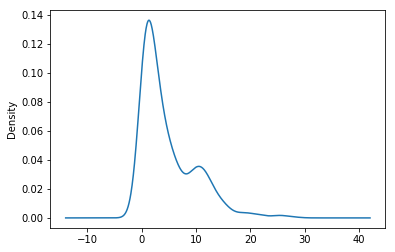

In [29]:
df.A3.plot(kind='density')

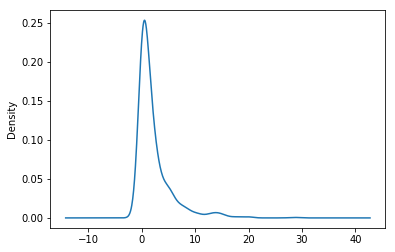

In [30]:
df.A8.plot(kind='density')

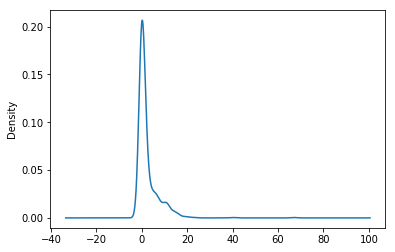

In [31]:
df.A11.plot(kind='density')

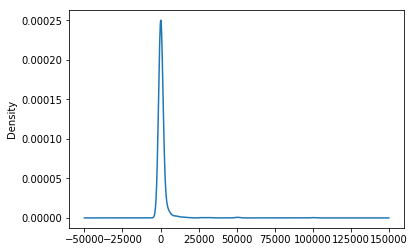

In [32]:
df.A15.plot(kind='density')

In [33]:
# standardize each numeric using either Zscore or MinMax, according to the columns distribution

In [34]:
def zscore_norm(x, mean, std_dev):
    z = (x - mean)/std_dev
    return z

In [35]:
#A3

df.A3_mean = df.A3.mean()
df.A3_stdv = df.A3.std()

#A8

df.A8_mean = df.A8.mean()
df.A8_stdv = df.A8.std()

#A11

df.A11_mean = df.A11.mean()
df.A11_stdv = df.A11.std()

#A15

df.A15_mean = df.A15.mean()
df.A15_stdv = df.A15.std()

In [36]:
df["A3_z"] = zscore_norm(df.A3, df.A3_mean, df.A3_stdv)
df["A8_z"] = zscore_norm(df.A8, df.A8_mean, df.A8_stdv)
df["A11_z"] = zscore_norm(df.A11, df.A11_mean, df.A11_stdv)
df["A15_z"] = zscore_norm(df.A15, df.A15_mean, df.A15_stdv)

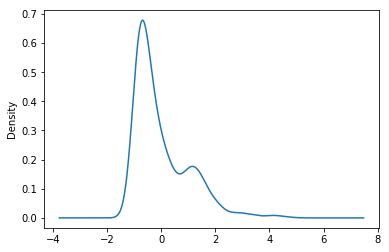

In [37]:
df.A3_z.plot(kind='density')

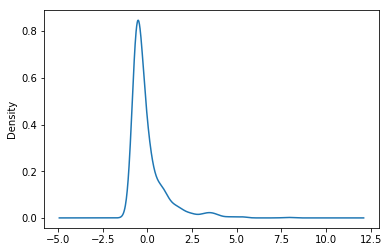

In [38]:
df.A8_z.plot(kind='density')

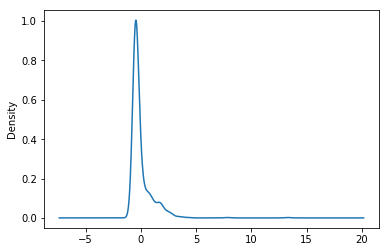

In [39]:
df.A11_z.plot(kind='density')

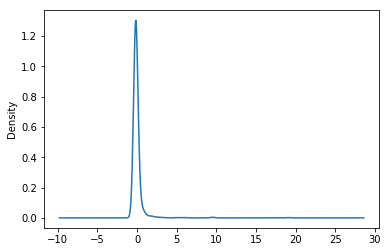

In [40]:
df.A15_z.plot(kind='density')

## 5. Apply these methods on our own dataset, as appropriate
Where appropriate, apply each of these methods on your own dataset and plot the results. 

In [41]:
my_dataset = pd.read_csv(r"C:\Users\eunn\Downloads\student\student-mat.csv")

In [42]:
my_dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [43]:
my_dataset.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


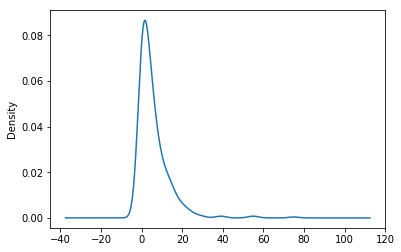

In [44]:
my_dataset.absences.plot(kind='density')

In [45]:
my_dataset.absences.describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

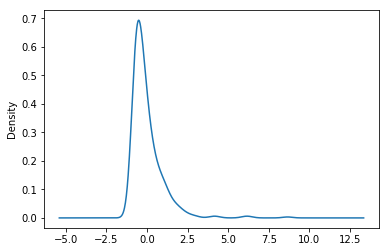

In [46]:
my_dataset.absences_mean = my_dataset.absences.mean()
my_dataset.absences_stdv = my_dataset.absences.std()
my_dataset["my_dataset_standardized"] = zscore_norm(my_dataset.absences, my_dataset.absences_mean, my_dataset.absences_stdv)
my_dataset["my_dataset_standardized"].plot(kind='density')

In [47]:
my_dataset["my_dataset_standardized"].describe()

count    3.950000e+02
mean     5.986772e-17
std      1.000000e+00
min     -7.133316e-01
25%     -7.133316e-01
50%     -2.135250e-01
75%      2.862816e-01
max      8.658042e+00
Name: my_dataset_standardized, dtype: float64